## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1. Data from our lives	
2. Data manipulation/Exploratory Data Analysis
3. Multipe regression Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a pdf file of your work. 

Good luck!


## 1. Data from our Lives

### Describe a situation or problem from your job, everyday life, current events, etc., for which a regression model would be appropriate. List some (up to 5) predictors that you might use.

**your answer should go here**

I have considered Situation or Problem from everyday life: Predicting Monthly Utility Bills

In everyday life, households face the challenge of predicting and managing their monthly utility bills, including      electricity, water, and gas. To address this issue, a regression model can be employed, which serves as a tool for forecasting the expected costs of these monthly utility bills. The model relies on the following key predictors:

1-Climate and Season: The local climate conditions, particularly temperature and seasonal variations, play a crucial    role. For example, colder months result in increased heating needs, which may lead to higher energy and gas           consumption, subsequently affecting the utility bills.

2-Water Usage: This predictor focuses on forecasting the water bill, considering the monthly water consumption of the household, typically measured in gallons or cubic meters. Greater water usage corresponds to a higher water bill.

3-Energy Consumption: This predictor helps in estimating the electricity bill and is based on the household's monthly energy usage, typically measured in kilowatt-hours (kWh). The more energy a household consumes, the higher the electricity bill is expected to be.

4-Rate Tariffs: The utility rate structure, including factors like tiered pricing, time-of-use rates, and other pricing schemes imposed by the service provider, significantly influences the monthly bills.

5-Gas Usage: If a household utilizes natural gas for heating and cooking, the volume of gas consumed becomes a pivotal predictor in predicting the gas bill. This consumption is often measured in units such as therms or cubic meters.

Gathering data on these predictors and utilizing historical utility bill information, a regression model can be developed. This model assists households in predicting their monthly utility bills more accurately, enabling better financial planning and encouraging energy conservation practices to reduce costs.

## The data

**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [1]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
#Read in data
df =pd.read_csv('auto_imports1.csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


## 2. Data 

## 2.1 Munging

Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

In [3]:
##your code here
# To Check the data types in the DataFrame
car_data_types = df.dtypes

car_data_types


fuel_type       object
body            object
wheel_base     float64
length         float64
width          float64
heights        float64
curb_weight      int64
engine_type     object
cylinders       object
engine_size      int64
bore            object
stroke          object
comprassion    float64
horse_power     object
peak_rpm        object
city_mpg         int64
highway_mpg      int64
price            int64
dtype: object

### Replace '?' with None

### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [4]:
## Your code here

# To Replace '?' with None
df = df.replace('?', None)

# To Convert bore, stroke, horse_power, peak_rpm to float64
object_columns_to_float = ["bore", "stroke", "horse_power", "peak_rpm"]
df[object_columns_to_float] = df[object_columns_to_float].astype(float)

# To Check if any remaining '?' values
if '?' in df.values:
    print("There are remaining '?' values in the DataFrame.")
else:
    print("There are no remaining '?' values in the DataFrame.")


There are no remaining '?' values in the DataFrame.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [6]:
## Your code here

# Dropping body,engine_type, cylinders columns from the dataset and renaming as df2
df.drop(columns=["body", "engine_type", "cylinders"], inplace=True)

# renaming df as df2 
df2 = df.copy()



In [7]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Drop all nan values

In [8]:
## your code goes here

## Droping rows with NaN values in the Dataset
df2 = df2.dropna()

In [9]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

### Get dummy variables for fuel_type within df2 drop first level

In [10]:
## Your code goes here


# Creating dummy variables for fuel_type
dummy_fuel_type = pd.get_dummies(df2['fuel_type'], prefix='fuel_type')

# Droping the first level of dummy variable
dummy_fuel_type = dummy_fuel_type.iloc[:, 1:]

# Replacing the original 'fuel_type' column with the dummy variables
df2 = pd.concat([df2, dummy_fuel_type], axis=1)

# Droping the original 'fuel_type' column
df2 = df2.drop(columns='fuel_type')


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    bool   
dtypes: bool(1), float64(9), int64(5)
memory usage: 23.0 KB


## 2.2 EDA on df2

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations
    Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to explain what you are doing


In [12]:
## Your EDA should start here
df2.describe()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
df2.value_counts()
# this is used for specific patterns and distributions

wheel_base  length  width  heights  curb_weight  engine_size  bore  stroke  comprassion  horse_power  peak_rpm  city_mpg  highway_mpg  price  fuel_type_gas
93.7        157.3   63.8   50.8     2128         98           3.03  3.39    7.6          102.0        5500.0    24        30           7957   True             2
96.3        172.4   65.4   51.6     2403         110          3.17  3.46    7.5          116.0        5500.0    23        30           9279   True             2
93.7        157.3   63.8   50.6     1967         90           2.97  3.23    9.4          68.0         5500.0    31        38           6229   True             2
86.6        144.6   63.9   50.8     1713         92           2.91  3.41    9.6          58.0         4800.0    49        54           6479   True             1
100.4       181.7   66.5   55.1     3095         181          3.43  3.27    9.0          152.0        5200.0    17        22           13499  True             1
                                       

In [14]:
df2_shape = df2.shape

#  to print Print the number of rows and columns
print("Number of rows:", df2_shape[0])
print("Number of columns:", df2_shape[1])

# This is find the shape of the data

Number of rows: 195
Number of columns: 15


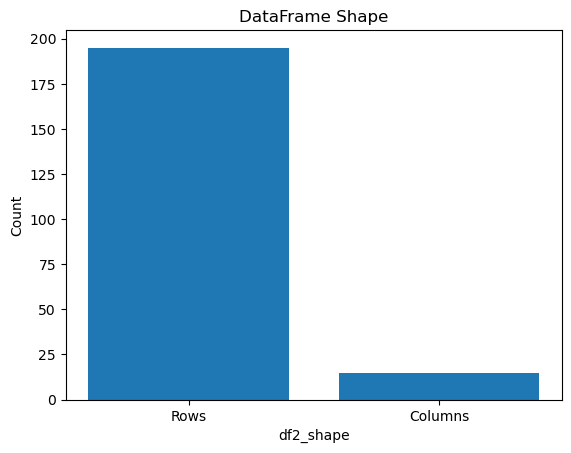

In [15]:

# showing shape as a bar plot
plt.bar(['Rows', 'Columns'], df2_shape)
plt.xlabel('df2_shape')
plt.ylabel('Count')
plt.title('DataFrame Shape')
plt.show()

In [16]:
#To check weather we have null values or not.
df2.isna().sum()

wheel_base       0
length           0
width            0
heights          0
curb_weight      0
engine_size      0
bore             0
stroke           0
comprassion      0
horse_power      0
peak_rpm         0
city_mpg         0
highway_mpg      0
price            0
fuel_type_gas    0
dtype: int64

In [17]:
df2.corr()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
wheel_base,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,0.585793,-0.303643
length,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324,0.695331,-0.210618
width,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220,0.754273,-0.245375
heights,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188,0.138291,-0.279070
curb_weight,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,0.835729,-0.219488
engine_size,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,0.888942,-0.063490
bore,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,0.546873,-0.056245
stroke,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,0.093746,-0.253774
comprassion,0.247730,0.160172,0.190997,0.261160,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941,0.069500,-0.985398
horse_power,0.375541,0.583813,0.616779,-0.084412,0.760285,0.842691,0.568527,0.100040,-0.214401,1.000000,0.105654,-0.834117,-0.812917,0.811027,0.168454


<Axes: title={'center': 'df2_correlation Heatmap'}>

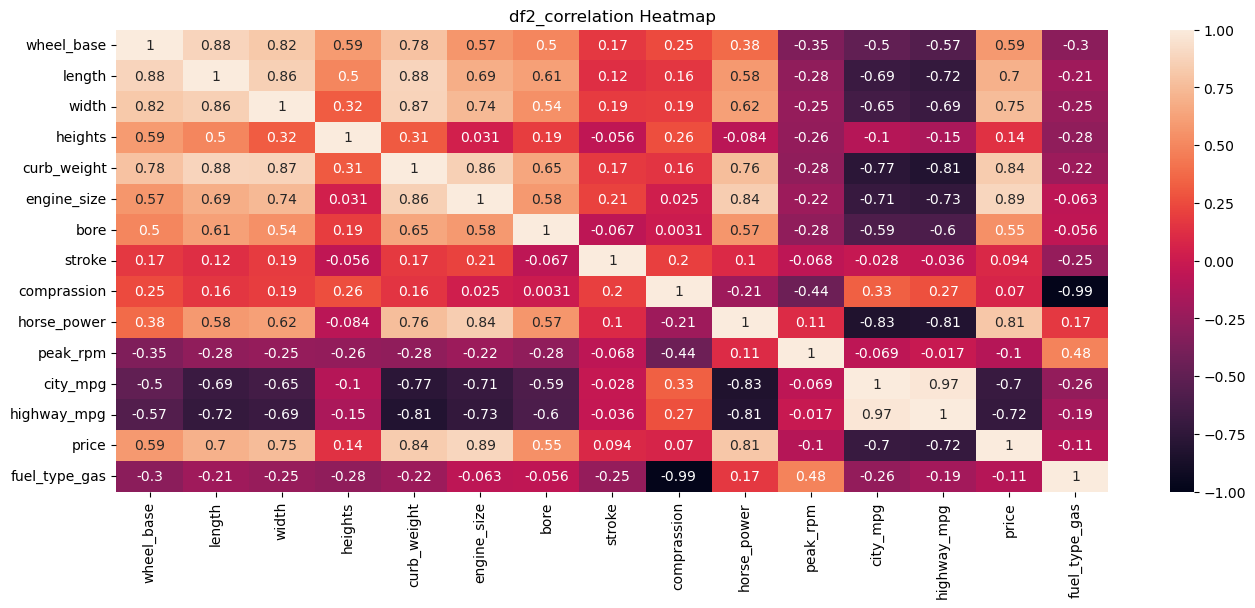

In [18]:
#Creating the heatmap to visualize the correlations using seaborn
plt.figure(figsize=(16, 6))

df2_heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
plt.title('df2_correlation Heatmap')
df2_heatmap


In [19]:
# intializing the correlation matrix to coor_matrix
corr_matrix = df2.corr()

# Seting the significance level
alpha = 0.05

# storing significant correlations in a empty dataframe.
significant_corr = pd.DataFrame(columns=corr_matrix.columns, index=corr_matrix.columns)

# To calculate significant correlations and to find the r value using the person testing and comparing with alpha value
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            corr, p_val = stats.pearsonr(df2[col1], df2[col2])
            if p_val < alpha:
                significant_corr.at[col1, col2] = True
            else:
                significant_corr.at[col1, col2] = False

# Filling diagonal elements with False to show there is no correlation with itself
np.fill_diagonal(significant_corr.values, False)

# Display significant correlations
print("These are the Significant Correlations:")
print(significant_corr)



These are the Significant Correlations:
              wheel_base length  width heights curb_weight engine_size   bore  \
wheel_base         False   True   True    True        True        True   True   
length              True  False   True    True        True        True   True   
width               True   True  False    True        True        True   True   
heights             True   True   True   False        True       False   True   
curb_weight         True   True   True    True       False        True   True   
engine_size         True   True   True   False        True       False   True   
bore                True   True   True    True        True        True  False   
stroke              True  False   True   False        True        True  False   
comprassion         True   True   True    True        True       False  False   
horse_power         True   True   True   False        True        True   True   
peak_rpm            True   True   True    True        True        Tru

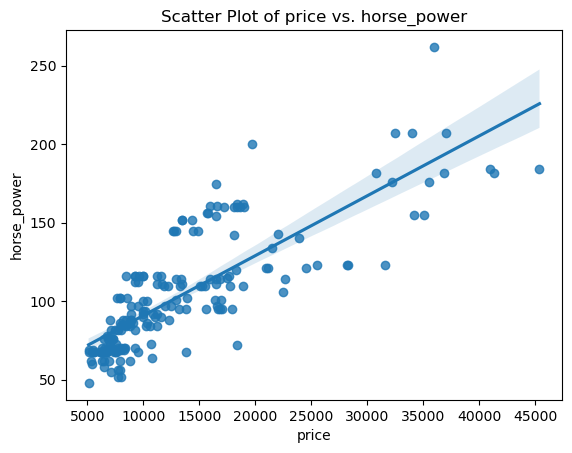

In [20]:
x_variable = "price"
y_variable = "horse_power"

# Creating a scatter plot for the two significant correlated variables
sns.regplot(x=x_variable, y=y_variable, data=df2)

# Adding labels and title
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f"Scatter Plot of {x_variable} vs. {y_variable}")
plt.show()

### These two are highly correlated as the coefficient value is closer to one and positive. So, if the horse power increses, Price  also increses


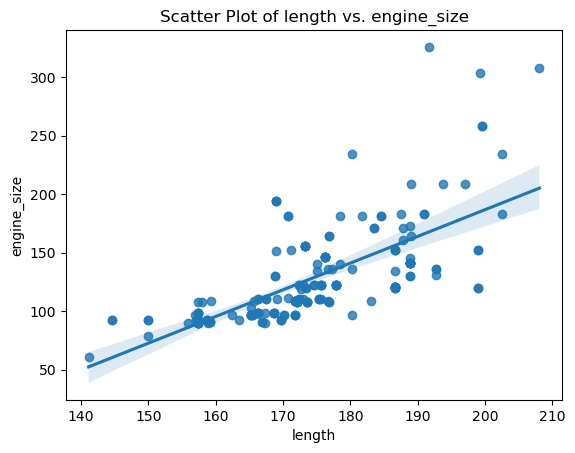

In [21]:
x_variable = "length"
y_variable = "engine_size"

# Creating a scatter plot for the two significant correlated variables
sns.regplot(x=x_variable, y=y_variable, data=df2)

# Adding labels and title
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f"Scatter Plot of {x_variable} vs. {y_variable}")
plt.show()

### These two are moderatly correlated as the coefficient value is not closer to one and positive. So, if the length increses, engine size  also increses

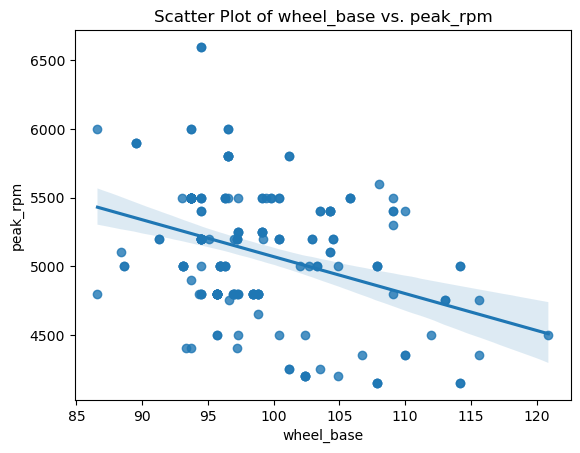

In [22]:
x_variable = "wheel_base"
y_variable = "peak_rpm"

# Creating a scatter plot for the two significant correlated variables
sns.regplot(x=x_variable, y=y_variable, data=df2)

# Adding labels and title
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f"Scatter Plot of {x_variable} vs. {y_variable}")
plt.show()

### These two are moderatly correlated as the coefficient value is  closer to Zero and Negative. So, if the peak_rpm decreses, wheel base  also decreses

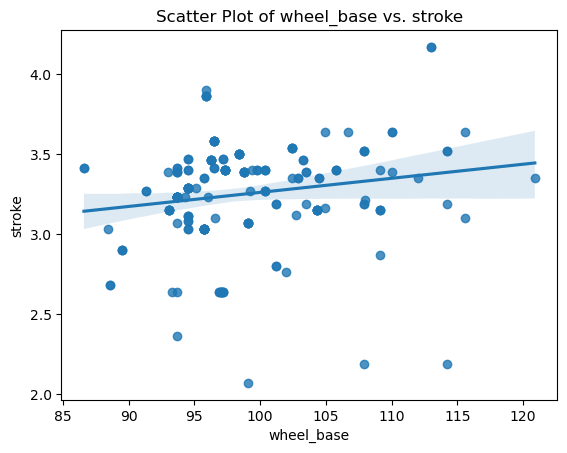

In [23]:
x_variable = "wheel_base"
y_variable = "stroke"

# Creating a scatter plot for the two significant correlated variables
sns.regplot(x=x_variable, y=y_variable, data=df2)

# Adding labels and title
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f"Scatter Plot of {x_variable} vs. {y_variable}")
plt.show()

### These two are weekly correlated as the coefficient value is  closer to Zero and positive. So, if the wheel_base increases, stoke also increases but not to efficient, and thats why it is weak significantly correlated

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

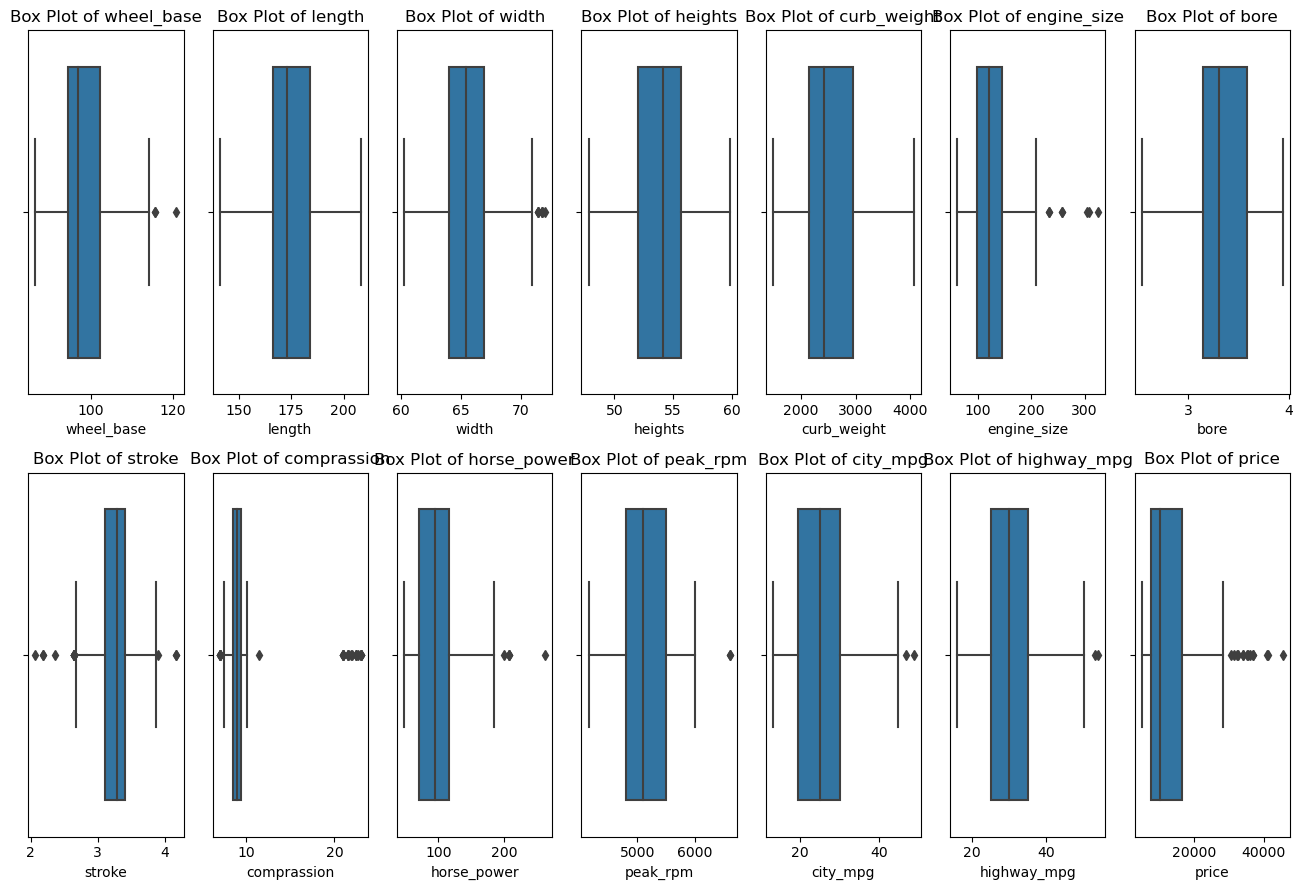

In [24]:
# collecting the number of coloumns and Creating box plots df2
combined_col = df2.select_dtypes(include=['float64', 'int64']).columns
boxplot_num = len(combined_col)

# initializing the number of rows and calculating the coloumns and Defining the number of rows and columns for subplots
rows_num = 2
cols_num = (boxplot_num + rows_num - 1) // rows_num
fig, axes = plt.subplots(rows_num, cols_num, figsize=(13, 9))

axes = axes.ravel()
# Looping through the numeric columns and create box plots
for i, col in enumerate(combined_col):
    sns.boxplot(x=df2[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of {col}")
#empty subplots are hidding
for i in range(boxplot_num, rows_num * cols_num):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [25]:
# Identify count of outliers using the IQR method
def iden_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Initialize a dictionary to store the count of outliers for each column
outlier_counts = {}

# Loop through the columns and identify outliers
for column in df2.columns:
    if column not in ['fuel_type_gas']:  # Exclude the 'fuel_type_gas' column
        outliers = iden_outliers(df2[column])
        outlier_counts[column] = outliers.sum()

# Print the counts of outliers for each column
for column, count in outlier_counts.items():
    print(f"Count of Outliers for {column}: {count}")


Count of Outliers for wheel_base: 3
Count of Outliers for length: 0
Count of Outliers for width: 7
Count of Outliers for heights: 0
Count of Outliers for curb_weight: 0
Count of Outliers for engine_size: 7
Count of Outliers for bore: 0
Count of Outliers for stroke: 18
Count of Outliers for comprassion: 27
Count of Outliers for horse_power: 5
Count of Outliers for peak_rpm: 2
Count of Outliers for city_mpg: 2
Count of Outliers for highway_mpg: 2
Count of Outliers for price: 14


In [29]:
lower_bound = 0.05  # Example: Lower bound at 5th percentile
upper_bound = 0.95 
# calculating the count of outliers for each column
count_outliers = (df2 < lower_bound) | (df2 > upper_bound)
# Columns with outliers
outlier_columns = ['wheel_base', 'width', 'length', 'heights', 'engine_size', 'stroke', 'comprassion', 'horse_power', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

# To Handle Outliers
df2 = df2[~iden_outliers(df2['wheel_base'])]
df2 = df2[~iden_outliers(df2['width'])]
df2 = df2[~iden_outliers(df2['length'])]
df2 = df2[~iden_outliers(df2['heights'])]
df2 = df2[~iden_outliers(df2['engine_size'])]
df2 = df2[~iden_outliers(df2['stroke'])]
df2 = df2[~iden_outliers(df2['comprassion'])]
df2 = df2[~iden_outliers(df2['horse_power'])]
df2 = df2[~iden_outliers(df2['peak_rpm'])]
df2 = df2[~iden_outliers(df2['city_mpg'])]
df2 = df2[~iden_outliers(df2['highway_mpg'])]
df2 = df2[~iden_outliers(df2['price'])]
df2 = df2[~iden_outliers(df2['fuel_type_gas'])]

#Data Transformation
df2['wheel_base'] = df2['wheel_base'].apply(lambda x: np.log(x))
df2['width'] = df2['width'].apply(lambda x: np.log(x))
df2['heights'] = df2['heights'].apply(lambda x: np.log(x))
df2['engine_size'] = df2['engine_size'].apply(lambda x: np.log(x))
df2['stroke'] = df2['stroke'].apply(lambda x: np.log(x))
df2['comprassion'] = df2['comprassion'].apply(lambda x: np.log(x))
df2['horse_power'] = df2['horse_power'].apply(lambda x: np.log(x))
df2['peak_rpm'] = df2['peak_rpm'].apply(lambda x: np.log(x))
df2['city_mpg'] = df2['city_mpg'].apply(lambda x: np.log(x))
df2['highway_mpg'] = df2['highway_mpg'].apply(lambda x: np.log(x))
df2['price'] = df2['price'].apply(lambda x: np.log(x))
df2['fuel_type_gas'] = df2['fuel_type_gas'].apply(lambda x: np.log(x))

#Winsorizing
def winsorize(column):
    lower_bound = column.quantile(0.05)
    upper_bound = column.quantile(0.95)
    return np.clip(column, lower_bound, upper_bound)

df2['wheel_base'] = winsorize(df2['wheel_base'])
#df2['heights'] = winsorize(df2['heights'])
df2['width'] = winsorize(df2['width'])
df2['engine_size'] = winsorize(df2['engine_size'])
df2['stroke'] = winsorize(df2['stroke'])
df2['comprassion'] = winsorize(df2['comprassion'])
df2['horse_power'] = winsorize(df2['horse_power'])
df2['peak_rpm'] = winsorize(df2['peak_rpm'])
df2['city_mpg'] = winsorize(df2['city_mpg'])
df2['highway_mpg'] = winsorize(df2['highway_mpg'])
df2['price'] = winsorize(df2['price'])
df2['fuel_type_gas'] = winsorize(df2['fuel_type_gas'])

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [ ]:
# collecting the number of coloumns and Creating box plots df2
combined_col = df2.select_dtypes(include=['float64', 'int64']).columns
boxplot_num = len(combined_col)

# initializing the number of rows and calculating the coloumns and Defining the number of rows and columns for subplots
rows_num = 2
cols_num = (boxplot_num + rows_num - 1) // rows_num
fig, axes = plt.subplots(rows_num, cols_num, figsize=(13, 9))

#for easy iteration
axes = axes.ravel()
# Looping through the numeric columns and create box plots
for i, col in enumerate(combined_col):
    sns.boxplot(x=df2[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of {col}")
#empty subplots are hidding
for i in range(boxplot_num, rows_num * cols_num):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [ ]:
# Checking and displaying outliers for each column
for col in df2.columns:
    if col != 'fuel_type_gas':  # Exclude the 'fuel_type_gas' column
        outliers = iden_outliers(df2[col])
        print(f"Outliers in {col}: {outliers.sum()}")


In [ ]:
df2_shape = df2.shape

#  to print Print the number of rows and columns
print("Number of rows:", df2_shape[0])
print("Number of columns:", df2_shape[1])

# This is find the shape of the data


# showing shape as a bar plot
plt.bar(['Rows', 'Columns'], df2_shape)
plt.xlabel('df2_shape')
plt.ylabel('Count')
plt.title('DataFrame Shape')
plt.show()

## 3. Multiple Regression Analysis ! Use the df2 dataset!

**1. Create a model that uses all the variables** and call it model1. The dependent variable is price, the independent variables are all the rest. Print out a summary of the model (coefficents, stanrard errors, confidence intervals and other metrics shown in class and answer the quesions based on your output.

In [ ]:
##Your code goes here

# intialising dependent variable (price)
dependent_y = df2['price']

#dropping dependent variable to intialize independent variables 
independent_X = df2.drop(columns=['price'])

# Adding a constant to the independent variables
independent_X = sm.add_constant(independent_X)

# Fit the multiple regression model
model1 = sm.OLS(dependent_y, independent_X).fit()

# Print the summary of the model
print(model1.summary())


1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it?
5. What is the F-statistics used for? How do you interpret it for this model?

1) Intercept:
For each variable, it is the measurement of how change in that variable affects the independent variable. It is the ‘m’ in ‘y = mx + b’ One unit of change in the dependent variable will affect the variable’s coefficient’s worth of change in the independent variable. If the coefficient is negative, they have an inverse relationship. As one rises, the other falls. Here 37% is the change can be made. The intercept is the predicted value of the dependent variable when the independent variables are 0. It may be important to interpret

2. Number of Statistically Significant Variables: 
 In this output, you can see that "wheel_base," "curb_weight," "horse_power,", "city_mpg" are statistically significant as their p-values are less than 0.05. If the p-value is less than your chosen significance level (commonly 0.05) These the variable is statistically significant.
 
3. Variance of the Model: 
The variance of the model, is calculated with the summation of Df residuals and Df models, so from the output 118+13=131

4. Coefficient of Determination: 
 The R-squared value is 0.869, which means that 86.9% of the variance in the dependent variable (price) is explained by the independent variables in the model. It shows that it is a good fit. The R-squared value is a measure of how well the independent variables explain the variability in the dependent variable.

5. F-Statistics:
 F-statistic tests are the overall significance of the model. In the output above, the F-statistic is 60.29, and the associated probability (Prob(F-statistic)) is very close to zero (9.33e-46). This indicates that at least one independent variable is significant in predicting the dependent variable. uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. In this case, it is telling us 0.00933% chance of this model 1

**2. Drop all the variables that are not statistically significant** at least at 90% confidence level. Run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. Call it model2. Print a summary of the results and answer the questions bellow. 

In [ ]:
# Define a confidence level (90%)
confidence_level = 0.10  # 1 - 0.90

# Find statistically significant variables at a 90% confidence level
significant_variables = model1.pvalues[model1.pvalues < confidence_level].index

# Create a new DataFrame with only significant variables
df2_model2 = df2[significant_variables]

# Initialize the dependent variable (price)
dependent_y_model2 = df2['price']

# Adding a constant to the independent variables
independent_X_model2 = sm.add_constant(df2_model2)

# Fit the multiple regression model (model2)
model2 = sm.OLS(dependent_y_model2, independent_X_model2).fit()

# Print the summary of the model (model2)
print(model2.summary())


In [ ]:
#  Mean Squared Error (MSE) for Model 1
mse_model1 = model1.mse_resid
print("MSE for Model 1:", mse_model1)

#  Mean Squared Error (MSE) for Model 2
mse_model2 = model2.mse_resid
print("MSE for Model 2:", mse_model2)

mse = model1.mse_resid
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it? What is the Adjusted R-squared and compare it to the model1's value. 
5. What is the F-statistics used for? How do you interpret it for this model?

1) Intercept:
The intercept is the predicted value of the dependent variable when the independent variables are 0. It may be important to interpret, if you are working with independent variables which can assume the value of 0 and have a theoretical or practical relevance. If not, then sometimes it can be better to work with standardized regression coefficients of the independent variables and drop the intercept all together. It really depends if you are conducting a linear or multiple linear regression, it depends if the interpretation of the zeros of your independent variables make sense or not. It may not have a direct, meaningful interpretation since most independent variables don't start at zero. However, it's included for mathematical completeness.

2. Number of Statistically Significant Variables: 
 In this output, you can see that "wheel_base," "curb_weight," "horse_power," "city_mpg" are statistically significant as their p-values are less than 0.05. If the p-value is less than your chosen significance level (commonly 0.05) These the variable is statistically significant.
 
3. Variance of the Model:
The Total variance of the model, is calculated with the summation of Df residuals and Df models, so from the output 127+4=131

4. Coefficient of Determination: 
 The R-squared value is 0.855, which means that 85.5% of the variance in the dependent variable (price) is explained by the independent variables in the model. It shows that it is a good fit. The R-squared value is a measure of how well the independent variables explain the variability in the dependent variable. In Model2, the Adjusted R-squared  is 0.850. It's slightly lower than Model1's R-squared of 0.855. The adjusted R-squared accounts for the number of predictors and provides a more conservative estimate of the model's explanatory power. While Model2's adjusted R-squared is lower, it still indicates a good fit, but it takes into account the more limited number of variables.

5. F-Statistics:
 F-statistic tests are the overall significance of the model. In the output above, the F-statistic is 187.0, and the associated probability (Prob(F-statistic)) is very close to zero (3.28e-52). This indicates that at least one independent variable is significant in predicting the dependent variable. uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. In this case, it is telling us 0.00328% chance of this model 2.

**3. Compare the two models with ANOVA**. What are your null and alternative hypothesis? What is your conclusion?

In [ ]:
# initializing the dependent variable (price)
dependent_y = df2['price']

# initializing the independent variables for Model1
independent_X1 = df2.drop(columns=['price'])

# Adding a constant to the independent variables for Model1
independent_X1 = sm.add_constant(independent_X1)

# Fiting Model1
model1 = sm.OLS(dependent_y, independent_X1).fit()

# initializing the independent variables for Model2
independent_X2 = df2[['wheel_base', 'curb_weight', 'horse_power', 'city_mpg']]

# Adding a constant to the independent variables for Model2
independent_X2 = sm.add_constant(independent_X2)

# Fitting Model2
model2 = sm.OLS(dependent_y, independent_X2).fit()

# ANOVA to compare the two models
anova_table = sm.stats.anova_lm(model1, model2)

# Output the ANOVA table
print(anova_table)




Null Hypothesis (H0): The null hypothesis states that there is no significant difference in the predictive power of the two models. In the context of ANOVA, this translates to all model coefficients (including the constant) being equal between the two models. Essentially, H0 suggests that Model1 is as good as Model2 in explaining the variance in the dependent variable (price).

Alternative Hypothesis (H1): The alternative hypothesis suggests that at least one coefficient in Model1 is significantly different from the corresponding coefficient in Model2, indicating that one model is superior in predicting the dependent variable compared to the other.

conclusion- As the p-values are NaN. we would compare the p-value to a significance level to determine whether you should reject the null hypothesis. since we have p value nan we can reject null hypothesis. However,Without valid p-values, it's not possible to draw a conclusion from the output. In this case, the F-statistic is 1.388605, but the p-value is NaN based on the ANOVA test.

**4.Checking the assumptions:**

-What are the assumptions?

-Do they hold?

In [ ]:

import matplotlib.pyplot as plt

# Get the residuals for Model 1 and Model 2
residuals1 = model1.resid
residuals2 = model2.resid

# Create Residuals vs. Fitted plots for Model 1 and Model 2
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(model1.fittedvalues, residuals1, alpha=0.5)
plt.axhline(0, color='blue', linestyle='--')
plt.title("Residuals vs. Fitted for Model 1")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

plt.subplot(122)
plt.scatter(model2.fittedvalues, residuals2, alpha=0.5)
plt.axhline(0, color='blue', linestyle='--')
plt.title("Residuals vs. Fitted for Model 2")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()



The residuals are randomly scattered around zero with no clear trend or shape, it suggests that the linearity assumption holds for both Model 1 and model 2.


In [ ]:
#Durbin-Watson statistic for residuals
watson_statistic = durbin_watson(model1.resid)

# Durbin-Watson statistic should be close to 2 for no autocorrelation
# Typically, values between 1.5 and 2.5 are considered acceptable
print("Durbin-Watson Statistic (Model 1):", watson_statistic)


model 1: 
independence of Errors (Durbin-Watson Statistic): The Durbin-Watson statistic is approximately 1.22, which is less than 2. This suggests that there might be positive autocorrelation in the residuals, indicating a potential issue with the independence of errors.

In [ ]:
# Durbin-Watson statistic for residuals in Model 2
watson_statistic_model2 = durbin_watson(model2.resid)

# Durbin-Watson statistic should be close to 2 for no autocorrelation
# Typically, values between 1.5 and 2.5 are considered acceptable
print("Durbin-Watson Statistic (Model 2):", watson_statistic_model2)


Model2:where a value close to 2 indicates no autocorrelation (which is desired). In this case, the value of 1.2643 for Model 2 suggests that there may be some positive autocorrelation in the residuals, as it is less than 1.5 and not close to the ideal value of 2. This indicates a potential violation of the independence of errors assumption for Model 2.

In [ ]:
_, p_value, _, _ = het_breuschpagan(model_residuals, model2.model.exog)
if p_value < 0.05:
    print('Heteroscedasticity detected model 2 (p-value < 0.05).')
else:
    print('No evidence of heteroscedasticity model 2 (p-value >= 0.05).')


In [ ]:
_, p_value, _, _ = het_breuschpagan(residuals1, model1.model.exog)

if p_value < 0.05:
    print('Heteroscedasticity detected in Model 1 (p-value < 0.05).')
else:
    print('No evidence of heteroscedasticity in Model 1 (p-value >= 0.05).')


If heteroscedasticity is detected in both Model 1 and Model 2 (p-value < 0.05), it suggests that the assumption of homoscedasticity is not met. In other words, the variance of the residuals is not constant across all levels of the independent variables, indicating a violation of the homoscedasticity assumption.

Therefore, based on this information, the assumption of homoscedasticity does not hold for both models. Heteroscedasticity in the residuals can lead to unreliable parameter estimates and standard errors, which may affect the interpretation of the regression results. It's important to consider addressing this issue when using these models for inference or prediction.

In [ ]:
# Assuming you have residuals for both Model 1 and Model 2
residuals1 = model1.resid
residuals2 = model2.resid

# Creating a histogram of residuals for both models
plt.hist(residuals1, bins=20, alpha=0.5, label='Model 1')
plt.hist(residuals2, bins=20, alpha=0.5, label='Model 2')
plt.legend()
plt.title('Histogram of Residuals')
plt.show()

# Creating Q-Q plots for residuals of both models
stats.probplot(residuals1, dist="norm", plot=plt)
plt.title("Q-Q Plot for Model 1 Residuals")
plt.show()

stats.probplot(residuals2, dist="norm", plot=plt)
plt.title("Q-Q Plot for Model 2 Residuals")
plt.show()


The points in the Q-Q plots are approximately along the diagonal line, it suggests that the residuals follow a normal distribution for both Model1 and model 2.

In [ ]:
#the residuals for Model 1
residuals_model1 = model1.resid

#the residuals for Model 2
residuals_model2 = model2.resid

#Creating ACF plots for both models
fig, axes = plt.subplots(2, 1, figsize=(7, 7))

# ACF Plot for Model 1
sm.graphics.tsa.plot_acf(residuals_model1, lags=50, ax=axes[0], alpha=0.05)
axes[0].set_title("ACF Plot of Residuals (Model 1)")
axes[0].set_xlabel("Lag")
axes[0].set_ylabel("Autocorrelation")

# ACF Plot for Model 2
sm.graphics.tsa.plot_acf(residuals_model2, lags=40, ax=axes[1], alpha=0.05)
axes[1].set_title("ACF Plot of Residuals (Model 2)")
axes[1].set_xlabel("Lag")
axes[1].set_ylabel("Autocorrelation")

plt.tight_layout()
plt.show()


For ACF plot for model 1 and model 2 : The horizontal line at y=0 represents no autocorrelation. From the output we can interpret that The vertical bars extending beyond the shaded region represent the autocorrelation at different lag values. lets consider suppose we want to compute the value at lag5 then we need to do lm(y~ lag1+lag2+lag3+lag4+lag5). so for y_prediction = alpha+[betalag1 + betalag2+ betalag3 +betalag4 + betalag5] after substuting we can get y values. at lag0,lag1,lag2 the vertical bars extend significantly beyond the shaded region, it suggests the presence of autocorrelation at that lag. So this assumption holds.

**5. Is there Multicollinearity in your data?**

In [ ]:
##your code goes here
#  VIF for Model 1
m1_vif = pd.DataFrame()
m1_vif["Variable"] = independent_X.columns
m1_vif["VIF"] = [variance_inflation_factor(independent_X.values, i) for i in range(independent_X.shape[1])]

# Calculate VIF for Model 2
m2_vif = pd.DataFrame()
m2_vif["Variable"] = independent_X_model2.columns
m2_vif["VIF"] = [variance_inflation_factor(independent_X_model2.values, i) for i in range(independent_X_model2.shape[1])]

print("VIF for Model 1:")
print(m1_vif)

print("\nVIF for Model 2:")
print(m2_vif)


For Model 1: we can see that several variables have high VIF values (e.g., curb_weight, engine_size, city_mpg, highway_mpg), which may indicate multicollinearity. In general, VIF values above 5 or 10 are often considered indicative of multicollinearity. In this case, it suggests that the assumption of no or little multicollinearity does not hold for Model 1.


Model 2 : The VIF values for Model 2 are all below 10, which is a common threshold for identifying multicollinearity. Typically, VIF values below 10 are considered acceptable, indicating no or little multicollinearity. Therefore, for Model 2, the assumption of no or little multicollinearity appears to hold.